In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


연속된 문자 function에서 찾아 대응하기

In [106]:
target=['{','l','o','g','4','(','x',')','+','integral','(','l','n','(','3','*','x',')',')','d','x','-','x','(','2','x','z','y','/','3',')','4','}']
,
function=['cos','sin','tan','f(x)','log','ln','C','P','e','cosh','sinh','tanh','integral','i']

spfunction=['sp.cos','sp.sin','sp.tan','f(x)','log','ln','C','P','sp.exp','sp.cosh','sp.sinh','sp.tanh','integrate','sp.I']

function2=['cos','sin','tan','cosh','sinh','tanh','log','ln']

num = ['0','1','2','3','4','5','6','7','8','9']

small_letter = ["a","b","c", "d","e","f","g", "h","i","j","k", "l","m","n","o", "p","q","r","s", "t","u","v","w", "x","y","z"]

large_letter = ["A","B","C", "D","E","F","G", "H","I","J","K", "L","M","N","O", "P","Q","R","S", "T","U","V","W", "X","Y","Z"]

letter = ["a","b","c", "d","e","f","g", "h","i","j","k", "l","m","n","o", "p","q","r","s", "t","u","v","w", "x","y","z","A","B","C", "D","E","F","G", "H","I","J","K", "L","M","N","O", "P","Q","R","S", "T","U","V","W", "X","Y","Z"]

index = ['/','=','!','integral','[','>=','>','{','(','-','*','+',']','<=','<','}',')']

bracket = ["[","{","(",")","}","]"]

In [107]:
target1=''.join(target)
print(target1)

{log4(x)+integral(ln(3*x))dx-x(2xzy/3)4}


In [108]:
string=[]

In [109]:
count=len(target1)
while count>0:
    for i in range (len(target1)):
            for j in range (len(function)):
                if target1[:-i]==function[j]:
                    string = np.append(string,target1[:-i])
                    target1=target1[-i:]
                    count=count-(len(target1)-i)
                    i=0
            
                elif (len(target1[:-i])==1):
                    string=np.append(string,target1[:-i])
                    target1=target1[-i:]
                    count=count-1
                    i=0
                
                elif (len(target1)==1):
                    string=np.append(string,target1)
                    target1=[]
                    count=0
                    
                    

In [110]:
print(string)

['{' 'log' '4' '(' 'x' ')' '+' 'integral' '(' 'ln' '(' '3' '*' 'x' ')' ')'
 'd' 'x' '-' 'x' '(' '2' 'x' 'z' 'y' '/' '3' ')' '4' '}']


In [111]:
string1=[]
string2=[]
string3=[]
string4=[]
string5=[]
string6=[]
string7=[]
string8=[]
for j in range(len(string)):
    if string[j]=="integral" and string[j+1]=="(":
        string[j]="integrate"
        for i in range(len(string)):
            if string[i]==")" and string[i+1]=="d":
                string1=np.append(string[:j+1],"(")
                string[i+1]=","
                string2=np.append(string[j+1:i+3],")")
                string3=np.append(string1,string2)
                string=np.append(string3,string[i+3:])
                break
    elif string[j]=="i":
        string[i]="I"
    elif string[j]=="log":
        for h in range(j,len(string)):
            if string[h]=="(":
                for k in range(h,len(string)):
                    if string[k]==")":
                        string4=np.append(string[:j+1],string[h:k])
                        string5=np.append(",",string[j+1:h])
                        string6=np.append(string4,string5)
                        string=np.append(string6,string[k:])
                        break
                break

In [112]:
print(string)

['{' 'log' '(' 'x' ',' '4' ')' '+' 'integrate' '(' '(' 'ln' '(' '3' '*'
 'x' ')' ')' ',' 'x' ')' '-' 'x' '(' '2' 'x' 'z' 'y' '/' '3' ')' '4' '}']


알파벳 앞 뒤로 숫자가 있으면 그 사이에 * 추가

In [113]:
#test
testarr = ["x","1","0"]
testarr[1] = index[10]+testarr[1]
print(testarr[1])

*1


In [114]:
string1=[]

for i in range(len(string)-1):
    #알파벳 뒤에 숫자
    for j in range(len(letter)):
        for k in range(len(num)):
            if (letter[j] == string[i]) and (num[k]==string[i+1]):
                string1=np.append(string[:i+1],['*'])
                string=np.append(string1,string[i+1:])
            
for i in range(1,len(string)):
    #알파벳 앞에 숫자
    for j in range(len(letter)):
        for k in range(len(num)):
            if (letter[j] == string[i]) and (num[k]==string[i-1]):
                string1=np.append(string[:i],['*'])
                string=np.append(string1,string[i:])
            

In [115]:
print(string)

['{' 'log' '(' 'x' ',' '4' ')' '+' 'integrate' '(' '(' 'ln' '(' '3' '*'
 'x' ')' ')' ',' 'x' ')' '-' 'x' '(' '2' '*' 'x' 'z' 'y' '/' '3' ')' '4'
 '}']


여는 괄호 앞에 숫자, letter 오면 그 사이에 * 추가

In [116]:
string1=[]
string2=[]
for i in range(len(string)-1):
    for j in range(len(letter)):
        if (letter[j] == string[i]) and (string[i+1]==bracket[0]):
            string1=np.append(string[:i+1],['*'])
            string=np.append(string1,string[i+1:])
                
        elif (letter[j] == string[i]) and (string[i+1]==bracket[1]):
            string1=np.append(string[:i+1],['*'])
            string=np.append(string1,string[i+1:])
            
        elif (letter[j] == string[i]) and (string[i+1]==bracket[2]):
            string1=np.append(string[:i+1],['*'])
            string=np.append(string1,string[i+1:])
    
    for k in range(len(num)):
        if (num[k] == string[i]) and (string[i+1]==bracket[0]):
            string2=np.append(string[:i+1],['*'])
            string=np.append(string2,string[i+1:])
                
        elif (num[k] == string[i]) and (string[i+1]==bracket[1]):
            string2=np.append(string[:i+1],['*'])
            string=np.append(string2string[i+1:])
            
        elif (num[k] == string[i]) and (string[i+1]==bracket[2]):
            string2np.append(string[:i+1],['*'])
            string=np.append(string2string[i+1:])

In [117]:
print(string)

['{' 'log' '(' 'x' ',' '4' ')' '+' 'integrate' '(' '(' 'ln' '(' '3' '*'
 'x' ')' ')' ',' 'x' ')' '-' 'x' '*' '(' '2' '*' 'x' 'z' 'y' '/' '3' ')'
 '4' '}']


닫는 괄호 뒤에 숫자,letter 오면 그 사이에 * 추가

In [118]:
string1=[]

for i in range(1,len(string)):
    for j in range(len(letter)):
        if (letter[j] == string[i]) and (string[i-1]==bracket[3]):
            string1=np.append(string[:i],['*'])
            string=np.append(string1,string[i:])
                
        elif (letter[j] == string[i]) and (string[i-1]==bracket[4]):
            string1=np.append(string[:i],['*'])
            string=np.append(string1,string[i:])
            
        elif (letter[j] == string[i]) and (string[i-1]==bracket[5]):
            string1=np.append(string[:i],['*'])
            string=np.append(string1,string[i:])
    
    for k in range(len(num)):
        if (num[k] == string[i]) and (string[i-1]==bracket[3]):
            string1=np.append(string[:i],['*'])
            string=np.append(string1,string[i:])
                
        elif (num[k] == string[i]) and (string[i-1]==bracket[4]):
            string1=np.append(string[:i],['*'])
            string=np.append(string1,string[i:])
            
        elif (num[k] == string[i]) and (string[i-1]==bracket[5]):
            string1=np.append(string[:i],['*'])
            string=np.append(string1,string[i:])

In [119]:
print(string)

['{' 'log' '(' 'x' ',' '4' ')' '+' 'integrate' '(' '(' 'ln' '(' '3' '*'
 'x' ')' ')' ',' 'x' ')' '-' 'x' '*' '(' '2' '*' 'x' 'z' 'y' '/' '3' ')'
 '*' '4' '}']


문자 와 문자 사이 생략된 * 추가

In [120]:
#test
test=['1','2','3','4']
test2=['5','6']
print(test[:2])
print(test2[:])
print(test[2:])
test=test[:2]+test2[:]+test[2:]
print(test)

['1', '2']
['5', '6']
['3', '4']
['1', '2', '5', '6', '3', '4']


In [121]:
for i in range(len(string)-1):
    for j in range(len(letter)):
        for k in range(len(letter)):
            if (string[i]==letter[j])and(string[i+1]==letter[k]):
                string1=[]
                string1=np.append(string[:i+1],index[10])
                string=np.append(string1,string[i+1:])
                
print(string)

['{' 'log' '(' 'x' ',' '4' ')' '+' 'integrate' '(' '(' 'ln' '(' '3' '*'
 'x' ')' ')' ',' 'x' ')' '-' 'x' '*' '(' '2' '*' 'x' '*' 'z' '*' 'y' '/'
 '3' ')' '*' '4' '}']


삼각함수 혹은 로그 뒤에 괄호 없으면 삽입 요청

In [122]:
for i in range(len(string)-1):
    for j in range(len(function2)):
        for k in range(3):
            if string[i] == function[j] and string[i+1] != bracket[k]:
                print("\n삼각함수와 로그함수 내부값은 괄호로 묶어 주십시오\n")
        


삼각함수와 로그함수 내부값은 괄호로 묶어 주십시오


삼각함수와 로그함수 내부값은 괄호로 묶어 주십시오


삼각함수와 로그함수 내부값은 괄호로 묶어 주십시오


삼각함수와 로그함수 내부값은 괄호로 묶어 주십시오



=이 들어왔을때 양 옆으로 수식이 존재하면 방정식을 한쪽으로 정리해서 작성해달라고 요청
=뒤에 아무런 값이 없을 경우 =을 지워서 저장

In [123]:
if string[0] == "=":
    string=string[1:]
elif string[-1]=="=":
    string=string[:-1]
    
for i in range(1,len(string)-1):
    if string[i]=="=":
        print("좌항 우항을 정리하여 한쪽으로 몰아주세요")

수식화 하기

In [124]:
arr=''.join(string)
arr2=[]
arr2=np.append(arr2,arr)
print(arr)

print(arr2)

{log(x,4)+integrate((ln(3*x)),x)-x*(2*x*z*y/3)*4}
['{log(x,4)+integrate((ln(3*x)),x)-x*(2*x*z*y/3)*4}']


sympy에 넣어보기

In [125]:
a,b,c,d,f,g,h,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,A,B,D,E,F,G,H,I,J,K,L,M,N,O,Q,R,S,T,U,V,W,X,Y,Z = sp.symbols("a b c d f g h j k l m n o p q r s t u v w x y z A B D E F G H I J K L M N O Q R S T U V W X Y Z")

In [126]:
expr=sp.sympify(arr2[0])

In [127]:
expr

{-8*x**2*y*z/3 + x*log(3*x) - x + log(x)/log(4)}

In [128]:
exprk=sp.simplify(expr)

In [132]:
exprk.subs([(x,16),(y,2),(z,3)])

FiniteSet(-4112 + log(16)/log(4) + 16*log(48))

In [131]:
exprk.subs([(x,16),(y,2),(z,3)]).evalf()

FiniteSet(-4048.06078382547)

In [140]:
exprg=sp.sympify("cos(x)+0.7")
exprg2=sp.sympify("sin(x)+1")

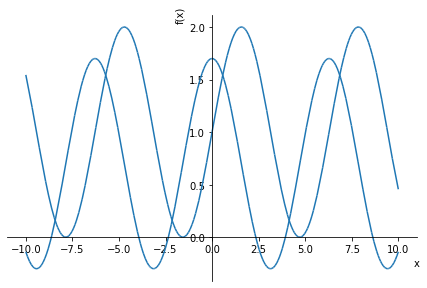

In [148]:
sp.plot(exprg,exprg2)